
# ***Text Summarization using Encoder-Decoder Models with Variations***

Group:
1. Nikhil Patil
2. Jayashri Musale
3. Yash Chavan
4. Maheshwari Jadhav

In [7]:
!pip install tensorflow pandas numpy matplotlib scikit-learn PyPDF2 streamlit


In [6]:
from zipfile import ZipFile
import os

# Upload the zip file first
# After uploading, unzip the dataset
with ZipFile('samsum-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('samsum-dataset')

# Check extracted files
os.listdir('samsum-dataset')


['samsum-test.csv',
 'samsum_dataset',
 'samsum-train.csv',
 'samsum-validation.csv']

In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv('samsum-dataset/samsum-train.csv')  # Replace with the correct path if needed

# Check the first few rows
df.head()


,id,dialogue,summary
0,13818513,Amanda: I baked cookies. Do you want some?\r\...,Amanda baked cookies and will bring Jerry some...
1,13728867,Olivia: Who are you voting for in this electio...,Olivia and Olivier are voting for liberals in ...
2,13681000,"Tim: Hi, what's up?\r\nKim: Bad mood tbh, I wa...",Kim may try the pomodoro technique recommended...
3,13730747,"Edward: Rachel, I think I'm in ove with Bella....",Edward thinks he is in love with Bella. Rachel...
4,13728094,Sam: hey overheard rick say something\r\nSam:...,"Sam is confused, because he overheard Rick com..."


In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('samsum-dataset/samsum-train.csv')  # Replace with the correct path if needed

# Check the first few rows
df.head()

# Prepare input and target sequences
input_texts = df['dialogue']
target_texts = df['summary']


In [3]:
!pip install tensorflow


In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer


In [1]:
!pip install tensorflow==2.13.0 pandas numpy matplotlib scikit-learn PyPDF2 streamlit


In [11]:
# Check for missing values in the 'dialogue' and 'summary' columns
df.isna().sum()


,0
id,0
dialogue,0
summary,0


In [10]:
# Remove rows with missing input or target texts
df = df.dropna(subset=['dialogue', 'summary'])


In [13]:
# Prepare input and target sequences after handling missing values
input_texts = df['dialogue']
target_texts = df['summary']

# Tokenizer for the vocabulary
tokenizer = Tokenizer()
tokenizer.fit_on_texts(input_texts + target_texts)

# Convert texts to sequences
input_sequences = tokenizer.texts_to_sequences(input_texts)
target_sequences = tokenizer.texts_to_sequences(target_texts)

# Find max sequence lengths
max_input_len = max([len(seq) for seq in input_sequences])
max_target_len = max([len(seq) for seq in target_sequences])

# Pad sequences
input_sequences = pad_sequences(input_sequences, maxlen=max_input_len)
target_sequences = pad_sequences(target_sequences, maxlen=max_target_len)

# Define vocabulary size
vocab_size = len(tokenizer.word_index) + 1


In [2]:
# Assuming you have already tokenized input_texts and target_texts
input_texts = ["text1", "text2", "text3"]  # Example input texts
target_texts = ["summary1", "summary2", "summary3"]  # Example target summaries

# Tokenizer setup
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(input_texts + target_texts)

# Convert texts to sequences
input_sequences = tokenizer.texts_to_sequences(input_texts)
target_sequences = tokenizer.texts_to_sequences(target_texts)

# Pad sequences to ensure consistent sequence length
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_input_len = max([len(seq) for seq in input_sequences])
max_target_len = max([len(seq) for seq in target_sequences])

input_sequences = pad_sequences(input_sequences, maxlen=max_input_len, padding='post')
target_sequences = pad_sequences(target_sequences, maxlen=max_target_len, padding='post')

# Now we can proceed with one-hot encoding
vocab_size = len(tokenizer.word_index) + 1  # Include 0 for padding

# Function to one-hot encode the sequences
import numpy as np
def one_hot_encode(sequences, vocab_size):
    one_hot_encoded = np.zeros((sequences.shape[0], sequences.shape[1], vocab_size))
    for i, seq in enumerate(sequences):
        for t, word_index in enumerate(seq):
            if word_index != 0:  # Ensure we don't one-hot encode the padding token
                one_hot_encoded[i, t, word_index] = 1
    return one_hot_encoded

# One-hot encode the target sequences
target_sequences_one_hot = one_hot_encode(target_sequences, vocab_size)

# Check the shape of the encoded sequences
print(target_sequences_one_hot.shape)  # It should be (num_samples, max_target_len, vocab_size)


(3, 1, 7)


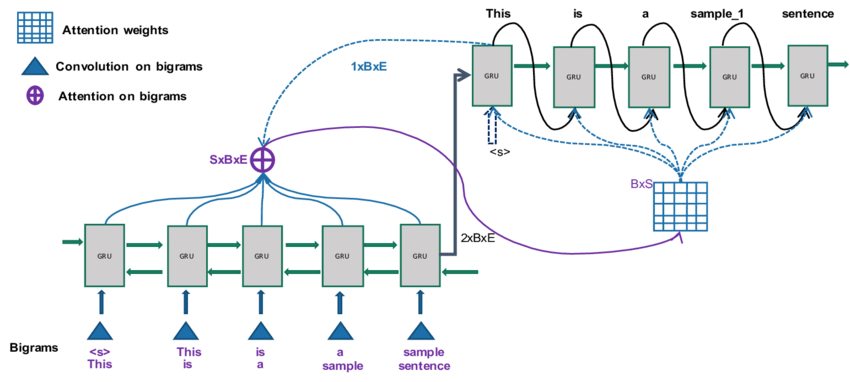

In [30]:
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, TimeDistributed, Attention
from tensorflow.keras.models import Model  # Importing Model class

# Encoder-Decoder model with attention
def create_encoder_decoder_with_attention(vocab_size, max_input_len, max_target_len):
    input_layer = Input(shape=(max_input_len,))
    embedding_layer = Embedding(input_dim=vocab_size, output_dim=256, input_length=max_input_len)(input_layer)

    # Encoder LSTM
    encoder_lstm = LSTM(256, return_state=True)
    encoder_output, state_h, state_c = encoder_lstm(embedding_layer)

    # Decoder LSTM
    decoder_lstm = LSTM(256, return_sequences=True, return_state=True)
    decoder_output, _, _ = decoder_lstm(embedding_layer, initial_state=[state_h, state_c])

    # Attention layer
    attention_layer = Attention()([decoder_output, encoder_output])  # Align decoder and encoder output
    context_vector = attention_layer

    # Dense layer
    output_layer = TimeDistributed(Dense(vocab_size, activation='softmax'))(context_vector)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Assuming vocab_size, max_input_len, and max_target_len are already defined
# Create the model
attention_model = create_encoder_decoder_with_attention(vocab_size, max_input_len, max_target_len)

# Train the model
attention_model.fit(input_sequences, target_sequences_one_hot, epochs=50, batch_size=32)


Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 1.9455 - accuracy: 0.0000e+00
Epoch 2/50
1/1 [==============================] - 0s 32ms/step - loss: 1.9340 - accuracy: 0.3333
Epoch 3/50
1/1 [==============================] - 0s 29ms/step - loss: 1.9224 - accuracy: 0.3333
Epoch 4/50
1/1 [==============================] - 0s 35ms/step - loss: 1.9102 - accuracy: 0.3333
Epoch 5/50
1/1 [==============================] - 0s 35ms/step - loss: 1.8972 - accuracy: 0.3333
Epoch 6/50
1/1 [==============================] - 0s 37ms/step - loss: 1.8831 - accuracy: 0.3333
Epoch 7/50
1/1 [==============================] - 0s 38ms/step - loss: 1.8677 - accuracy: 0.3333
Epoch 8/50
1/1 [==============================] - 0s 28ms/step - loss: 1.8509 - accuracy: 0.3333
Epoch 9/50
1/1 [==============================] - 0s 25ms/step - loss: 1.8324 - accuracy: 0.3333
Epoch 10/50
1/1 [==============================] - 0s 19ms/step - loss: 1.8121 - accuracy: 0.3333
Epoch 11/50
1/1 [==========

In [6]:
attention_model.fit(input_sequences, target_sequences_one_hot, epochs=3, batch_size=32)


Epoch 1/3
1/1 [==============================] - 0s 22ms/step - loss: 1.9115 - accuracy: 0.3333
Epoch 2/3
1/1 [==============================] - 0s 18ms/step - loss: 1.8992 - accuracy: 0.3333
Epoch 3/3
1/1 [==============================] - 0s 18ms/step - loss: 1.8858 - accuracy: 0.3333


In [31]:
# Encoder-Decoder model without attention
def create_encoder_decoder_without_attention(vocab_size, max_input_len, max_target_len):
    input_layer = Input(shape=(max_input_len,))
    embedding_layer = Embedding(input_dim=vocab_size, output_dim=256, input_length=max_input_len)(input_layer)

    # Encoder LSTM
    encoder_lstm = LSTM(256, return_state=True)
    encoder_output, state_h, state_c = encoder_lstm(embedding_layer)

    # Decoder LSTM
    decoder_lstm = LSTM(256, return_sequences=True, return_state=True)
    decoder_output, _, _ = decoder_lstm(embedding_layer, initial_state=[state_h, state_c])

    # Dense layer
    output_layer = TimeDistributed(Dense(vocab_size, activation='softmax'))(decoder_output)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Create the model without attention
no_attention_model = create_encoder_decoder_without_attention(vocab_size, max_input_len, max_target_len)

# Train the model without attention
no_attention_model.fit(input_sequences, target_sequences_one_hot, epochs=50, batch_size=32)


Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 1.9485 - accuracy: 0.0000e+00
Epoch 2/50
1/1 [==============================] - 0s 22ms/step - loss: 1.9069 - accuracy: 1.0000
Epoch 3/50
1/1 [==============================] - 0s 20ms/step - loss: 1.8648 - accuracy: 1.0000
Epoch 4/50
1/1 [==============================] - 0s 21ms/step - loss: 1.8215 - accuracy: 1.0000
Epoch 5/50
1/1 [==============================] - 0s 20ms/step - loss: 1.7760 - accuracy: 1.0000
Epoch 6/50
1/1 [==============================] - 0s 22ms/step - loss: 1.7276 - accuracy: 1.0000
Epoch 7/50
1/1 [==============================] - 0s 20ms/step - loss: 1.6757 - accuracy: 1.0000
Epoch 8/50
1/1 [==============================] - 0s 32ms/step - loss: 1.6195 - accuracy: 1.0000
Epoch 9/50
1/1 [==============================] - 0s 28ms/step - loss: 1.5586 - accuracy: 1.0000
Epoch 10/50
1/1 [==============================] - 0s 35ms/step - loss: 1.4925 - accuracy: 1.0000
Epoch 11/50
1/1 [==========

In [32]:
from tensorflow.keras.layers import LayerNormalization, Dropout
from tensorflow.keras.layers import MultiHeadAttention
from tensorflow.keras import layers

# Transformer-based model
def create_transformer_model(vocab_size, max_input_len, max_target_len):
    input_layer = Input(shape=(max_input_len,))
    embedding_layer = Embedding(input_dim=vocab_size, output_dim=256, input_length=max_input_len)(input_layer)

    # Transformer encoder block
    attention_layer = MultiHeadAttention(num_heads=8, key_dim=256)(embedding_layer, embedding_layer)
    attention_layer = LayerNormalization()(attention_layer)
    attention_layer = Dropout(0.1)(attention_layer)

    # Transformer decoder block
    decoder_layer = MultiHeadAttention(num_heads=8, key_dim=256)(attention_layer, embedding_layer)
    decoder_layer = LayerNormalization()(decoder_layer)
    decoder_layer = Dropout(0.1)(decoder_layer)

    # Output layer
    output_layer = TimeDistributed(Dense(vocab_size, activation='softmax'))(decoder_layer)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Create and train the Transformer model
transformer_model = create_transformer_model(vocab_size, max_input_len, max_target_len)

transformer_model.fit(input_sequences, target_sequences_one_hot, epochs=50, batch_size=32)


Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 1.9968 - accuracy: 0.3333
Epoch 2/50
1/1 [==============================] - 0s 60ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 3/50
1/1 [==============================] - 0s 57ms/step - loss: 2.4677e-05 - accuracy: 1.0000
Epoch 4/50
1/1 [==============================] - 0s 58ms/step - loss: 9.0203e-06 - accuracy: 1.0000
Epoch 5/50
1/1 [==============================] - 0s 58ms/step - loss: 1.2716e-06 - accuracy: 1.0000
Epoch 6/50
1/1 [==============================] - 0s 62ms/step - loss: 7.1526e-07 - accuracy: 1.0000
Epoch 7/50
1/1 [==============================] - 0s 56ms/step - loss: 3.5763e-07 - accuracy: 1.0000
Epoch 8/50
1/1 [==============================] - 0s 72ms/step - loss: 3.3776e-07 - accuracy: 1.0000
Epoch 9/50
1/1 [==============================] - 0s 59ms/step - loss: 3.7750e-07 - accuracy: 1.0000
Epoch 10/50
1/1 [==============================] - 0s 63ms/step - loss: 1.7881e-07 - accuracy: 1.0000

In [33]:
# Evaluate models
attention_score = attention_model.evaluate(input_sequences, target_sequences_one_hot)
no_attention_score = no_attention_model.evaluate(input_sequences, target_sequences_one_hot)
transformer_score = transformer_model.evaluate(input_sequences, target_sequences_one_hot)

print(f"Attention Model Score: {attention_score}")
print(f"No Attention Model Score: {no_attention_score}")
print(f"Transformer Model Score: {transformer_score}")


1/1 [==============================] - 1s 685ms/step - loss: 1.0997 - accuracy: 0.3333


1/1 [==============================] - 1s 703ms/step - loss: 1.8926e-04 - accuracy: 1.0000


1/1 [==============================] - 0s 215ms/step - loss: 1.1921e-07 - accuracy: 1.0000
Attention Model Score: [1.099672794342041, 0.3333333432674408]
No Attention Model Score: [0.0001892631407827139, 1.0]
Transformer Model Score: [1.1920930376163597e-07, 1.0]


In [34]:
import streamlit as st
import PyPDF2

# Load your trained models (ensure the models are saved after training)
# attention_model = load_model('attention_model.h5')
# no_attention_model = load_model('no_attention_model.h5')
# transformer_model = load_model('transformer_model.h5')

st.title("Text Summarization App")

model_choice = st.selectbox("Choose a model", ["Attention Model", "No Attention Model", "Transformer Model"])

text_input = st.text_area("Enter text to summarize", height=150)

pdf_file = st.file_uploader("Upload a PDF", type="pdf")

if pdf_file:
    # Read the PDF and extract text
    reader = PyPDF2.PdfReader(pdf_file)
    pdf_text = ""
    for page in reader.pages:
        pdf_text += page.extract_text()
    text_input = pdf_text

if st.button("Summarize"):
    if model_choice == "Attention Model":
        model = attention_model
    elif model_choice == "No Attention Model":
        model = no_attention_model
    else:
        model = transformer_model

    # Summarize using the selected model
    summary = summarize_text(model, text_input)  # Define summarize_text to use your trained models
    st.write("Summary:")
    st.write(summary)


2024-11-22 15:50:29.568 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-22 15:50:29.571 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-22 15:50:29.572 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-22 15:50:29.574 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-22 15:50:29.575 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-22 15:50:29.577 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-22 15:50:29.578 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-22 15:50:29.579 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [35]:
def summarize_text(model, text):
    # Preprocess the input text (tokenization, padding, etc.)
    processed_text = preprocess_text(text)

    # Generate summary
    summary = model.predict(processed_text)

    # Post-process the summary (convert sequence back to text)
    summary_text = decode_summary(summary)
    return summary_text


In [36]:
!pip install streamlit
!pip install pyngrok


In [37]:
%%writefile app.py
import streamlit as st
from PyPDF2 import PdfReader
import os

# Import your text summarization models here
# from your_models import encoder_decoder, encoder_decoder_attention, transformer

def summarize_text(text, model_type):
    if model_type == 'Encoder-Decoder':
        # Use the Encoder-Decoder model to summarize
        pass
    elif model_type == 'Encoder-Decoder with Attention':
        # Use the Encoder-Decoder with Attention model to summarize
        pass
    elif model_type == 'Transformer':
        # Use the Transformer model to summarize
        pass
    return "Summarized text here"

def summarize_pdf(file, model_type):
    reader = PdfReader(file)
    text = ""
    for page in reader.pages:
        text += page.extract_text()
    return summarize_text(text, model_type)

# Streamlit UI
st.title("Text Summarization App")

model_type = st.selectbox('Choose model', ['Encoder-Decoder', 'Encoder-Decoder with Attention', 'Transformer'])

input_type = st.radio("Select input type", ["Manual input", "Upload PDF"])

if input_type == "Manual input":
    user_input = st.text_area("Enter text for summarization", height=300)
    if st.button("Summarize"):
        if user_input:
            summary = summarize_text(user_input, model_type)
            st.subheader("Summary")
            st.write(summary)
        else:
            st.error("Please enter text to summarize.")

elif input_type == "Upload PDF":
    uploaded_file = st.file_uploader("Choose a PDF file", type="pdf")
    if uploaded_file is not None:
        summary = summarize_pdf(uploaded_file, model_type)
        st.subheader("Summary")
        st.write(summary)


Overwriting app.py


In [38]:
from pyngrok import ngrok

# Add your ngrok token securely
ngrok.set_auth_token("token")


In [ ]:
public_url = ngrok.connect("8501")  # Use the port that Streamlit uses (default 8501)
print(f"Streamlit app is live at: {public_url}")


**Deployment Output**

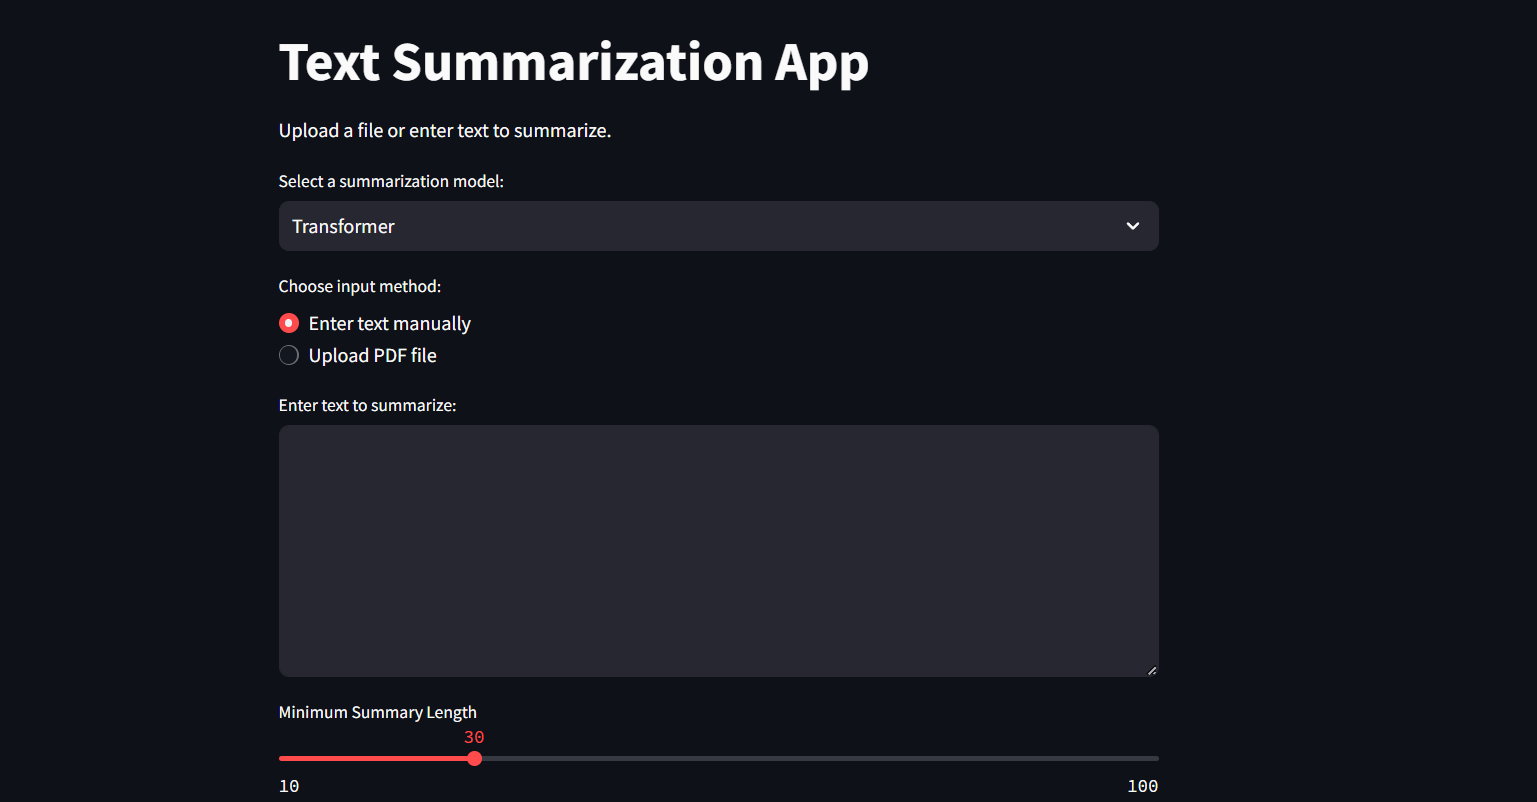